In [2]:
import pyswmm
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pathlib

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 600
matplotlib.rcParams["mathtext.fontset"]="dejavuserif"
matplotlib.rcParams['text.usetex'] = False

In [5]:
dir = pathlib.Path.cwd().parent.parent 
conts = pd.read_csv(dir/ 'Networks' / 'Modena' / 'Continuity and Computational Cost Files' /'Continuity_Errors_Timesteps_Final.csv')
conts.rename(columns = {conts.columns[0]:'Timestep',"10000m":"Original","250m":250, "100m": 100, "50m":50, "25m":25}, inplace=True)
conts.head()

,Timestep,Original,250,100,50,25
0,0.010000,19.964251,18.584988,12.807557,6.201694,3.778980
1,0.011220,19.283833,17.938965,11.604900,4.028074,1.602388
2,0.012589,18.728474,16.685324,9.587181,3.483303,1.402835
3,0.014125,18.280619,15.239358,6.479261,2.896116,1.245502
4,0.015849,17.308910,14.140605,5.674194,2.599670,1.102129


In [6]:
conts.sort_values('Timestep', inplace = True)
conts.reset_index(drop=True, inplace=True)
conts.set_index('Timestep', drop = True, inplace=True)
conts = abs(conts)

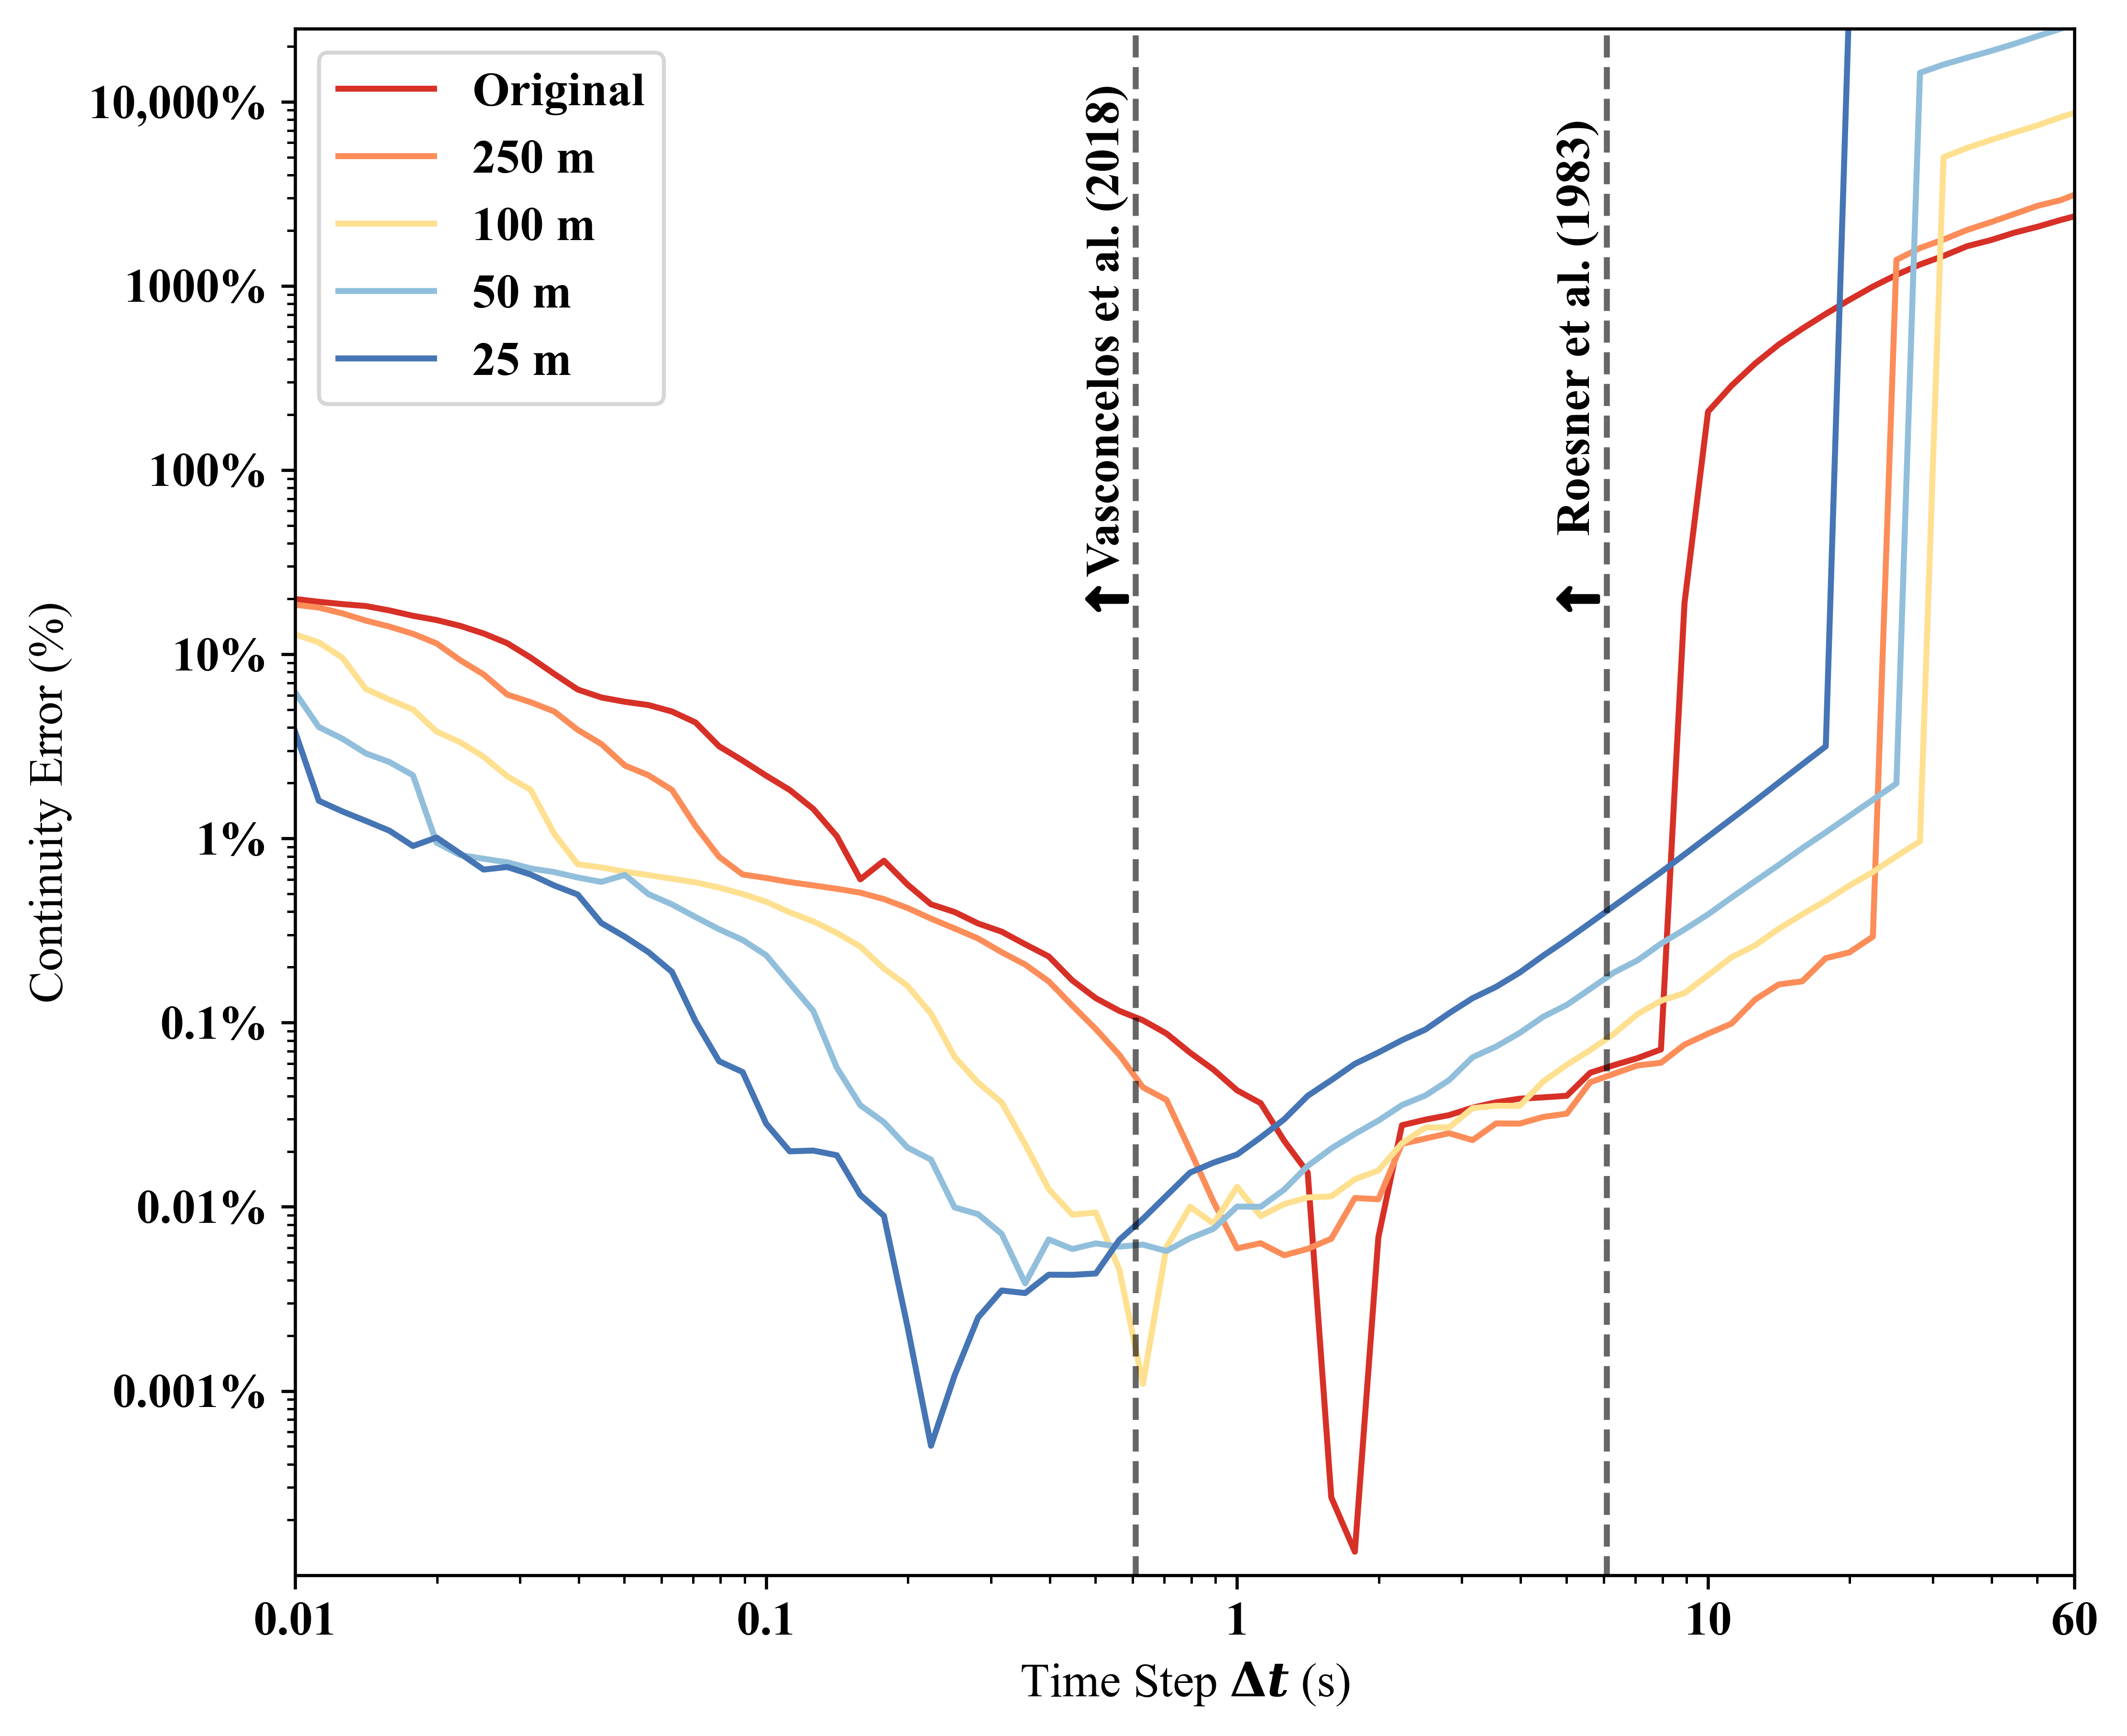

In [19]:
fig, ax = plt.subplots(1,1)

list_of_colors = ['#d73027', '#fc8d59','#fee090','#91bfdb',"#4575b4"]

fig.set_figheight(7)
fig.set_figwidth(8)

min_length = 6.03  #m
max_D =  0.1 #m
vasconcelos_t_max = 0.1 * min_length / np.sqrt(9.81 * max_D)
roesner_t_max = vasconcelos_t_max * 10


ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(conts.index, conts["Original"],c=list_of_colors[0], label = r"Original")
ax.plot(conts.index, conts[250], c=list_of_colors[1], label = "250 m")
ax.plot(conts.index, conts[100], c=list_of_colors[2], label = "100 m")
ax.plot(conts.index, conts[50], c=list_of_colors[3], label ="50 m")
ax.plot(conts.index, conts[25], c=list_of_colors[4], label ="25 m")
ax.plot([vasconcelos_t_max,vasconcelos_t_max],[0.00001,10000000],ls='dashed',c='black', alpha = 0.6)
ax.plot([roesner_t_max,roesner_t_max],[0.00001,10000000],ls='dashed',c='black', alpha = 0.6)
ax.annotate("Roesner et al. (1983)", (roesner_t_max-1.3,50),xycoords = 'data', rotation = 'vertical',fontsize =12)
ax.annotate("Vasconcelos et al. (2018)", (vasconcelos_t_max-0.13,30),xycoords = 'data', rotation = 'vertical',fontsize =12)
ax.plot(roesner_t_max-.8, 20,marker=r'$\leftarrow$', markersize=10,c='black')
ax.plot(vasconcelos_t_max-.08, 20,marker=r'$\leftarrow$', markersize=10,c='black')

formatter = plt.LogFormatter(labelOnlyBase=False)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(0.1,60)
ax.set_xticks([0.01,0.1,1, 10,60])
ax.set_xticklabels([0.01,0.1,1,10,60])
ax.set_yticks([0.001,0.01,0.1,1,10,100,1000,10000])
ax.set_ylim(0.0001,25000)
ax.set_yticklabels(["0.001%","0.01%","0.1%","1%","10%","100%","1000%","10,000%"])
ax.set_ylabel("Continuity Error (%)")
ax.set_xlabel(r"Time Step $\Delta t$ (s)")
ax.legend()

plt.savefig(dir / "Figures" / "Figure Files" / "Figure 4- Continuity Error vs Time step - Modena.png", dpi = 600)